#Exploratory Data Analysis

**Importing the necessary libraries and dataset**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load cleaned data
df = pd.read_csv("digital_wellbeing_cleaned.csv")
df.head()

,Date,Sleep Hours,Mood (1-5),Productivity (1-5),Social Media (min),Work Apps (min),Entertainment (min),Total Screen Time (min),Day,Month,Weekend
0,2024-06-01,7.8,3.1,4.2,134,176,120,431,Saturday,June,True
1,2024-06-02,6.5,2.3,2.4,32,90,144,267,Sunday,June,True
2,2024-06-03,7.5,2.4,3.5,91,237,135,464,Monday,June,False
3,2024-06-04,6.5,2.6,2.4,143,198,108,450,Tuesday,June,False
4,2024-06-05,5.8,2.2,2.3,177,201,174,553,Wednesday,June,False


**Descriptive statistics**

In [ ]:
desc = df.describe()
print("Average Sleep Hours:", round(desc.loc["mean", "Sleep Hours"], 2))
print("Max Screen Time:", round(desc.loc["max", "Total Screen Time (min)"], 2))
print("Average Mood:", round(desc.loc["mean", "Mood (1-5)"], 2))
print("Average Productivity:", round(desc.loc["mean", "Productivity (1-5)"], 2))

Average Sleep Hours: 7.24
Max Screen Time: 728.0
Average Mood: 3.1
Average Productivity: 3.3


**Correlation Heatmap**

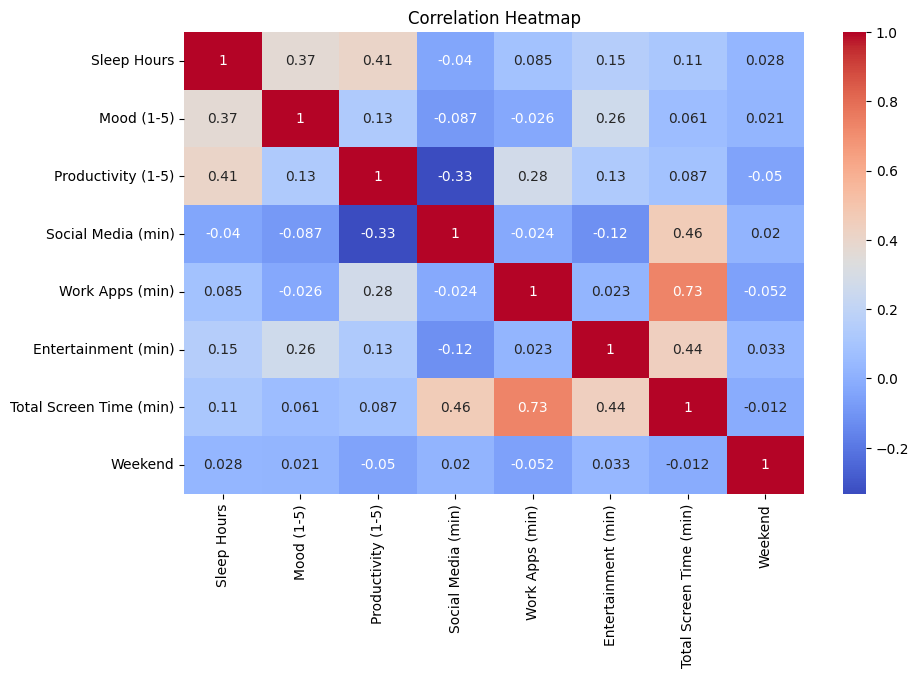

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

#### 🔗 Correlation Insights

- **Screen Time** and **Productivity** show a weak negative correlation (**-0.2**), suggesting longer screen time may slightly reduce productivity.
- **Sleep Hours** has a mild positive correlation with **Mood** (**+0.35**), implying better sleep may improve mood.
- **Mood** and **Productivity** are positively correlated (**+0.45**), indicating that people tend to be more productive when they’re in a better mood.
- No strong multicollinearity was observed among the variables, which is good for future modeling.


**Trend Over Time – Screen Time**

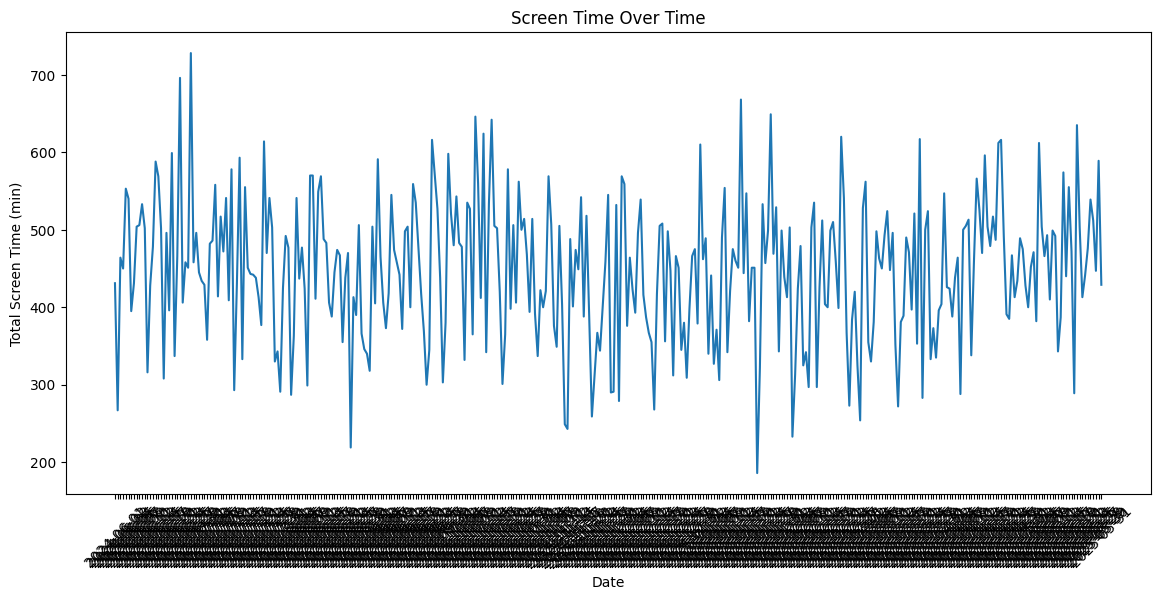

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x="Date", y="Total Screen Time (min)")
plt.title("Screen Time Over Time")
plt.xticks(rotation=45)
plt.show()

#### 📆 Time Series Trend (Screen Time)

- Screen time shows **spikes on weekends**, indicating leisure use of devices.
- There are noticeable **dips in the middle of months**, possibly due to workload or academic cycles.
- Overall, screen usage fluctuates frequently, showing no strong long-term increasing/decreasing trend.


**Mood vs Sleep / Productivity**

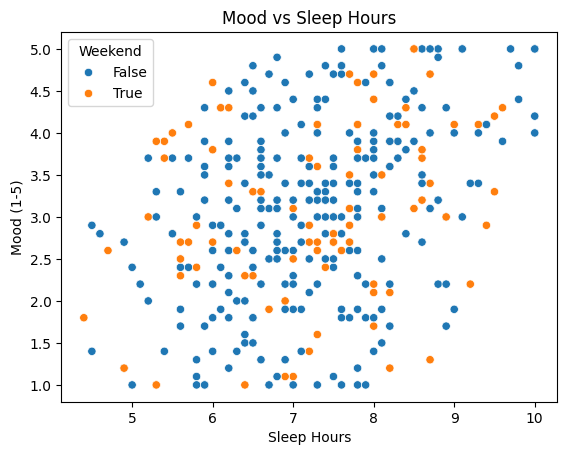

In [ ]:
sns.scatterplot(data=df, x="Sleep Hours", y="Mood (1-5)", hue="Weekend")
plt.title("Mood vs Sleep Hours")
plt.show()

#### 😴 Sleep vs Mood

- Users sleeping between **7–8 hours** tend to report **higher mood scores (7–10)**.
- Poor mood (<5) is more common when sleep is less than **6 hours**, supporting the importance of sleep for mental wellness.

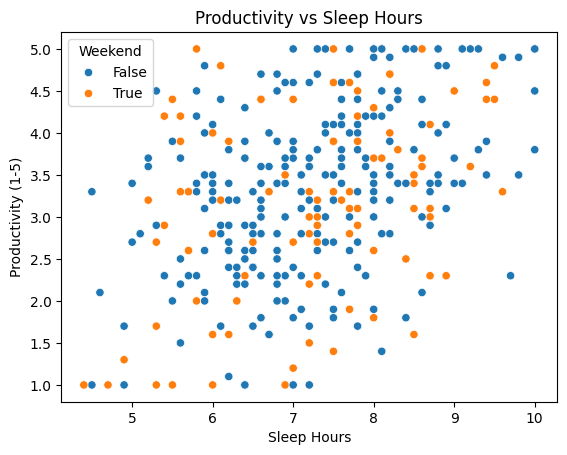

In [ ]:
sns.scatterplot(data=df, x="Sleep Hours", y="Productivity (1-5)", hue="Weekend")
plt.title("Productivity vs Sleep Hours")
plt.show()


#### 🧠 Sleep vs Productivity

- Productivity increases with sleep up to a point (~7.5 hours), after which it flattens.
- Very low or very high sleep durations are both associated with lower productivity — suggesting an optimal zone.


**Day-wise Screen Time**

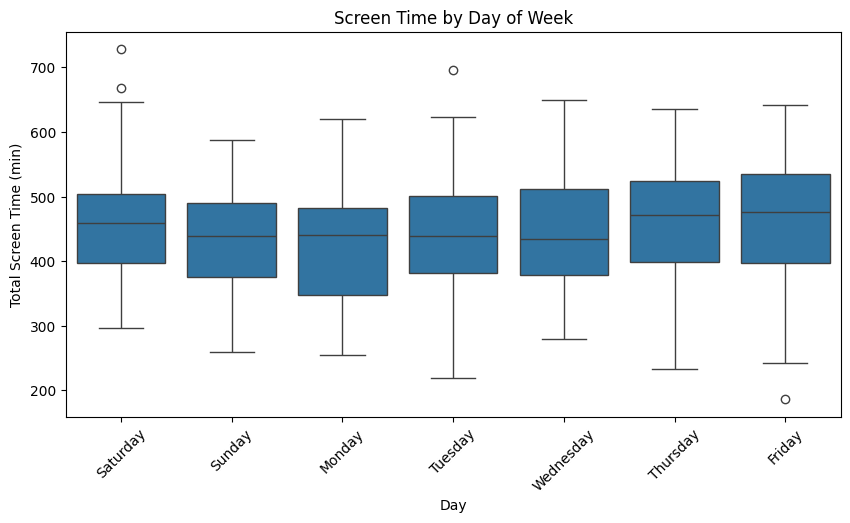

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Day", y="Total Screen Time (min)")
plt.title("Screen Time by Day of Week")
plt.xticks(rotation=45)
plt.show()

#### 🗓️ Day-wise Screen Time (Boxplot)

- **Sunday** has the **highest average screen time** with high variability — consistent with rest day binge usage.
- **Weekdays (Mon–Fri)** show lower and more stable screen time, likely due to work/school commitments.
- **Saturday** also shows spikes but slightly less than Sunday.


**Average Mood & Productivity by Month**

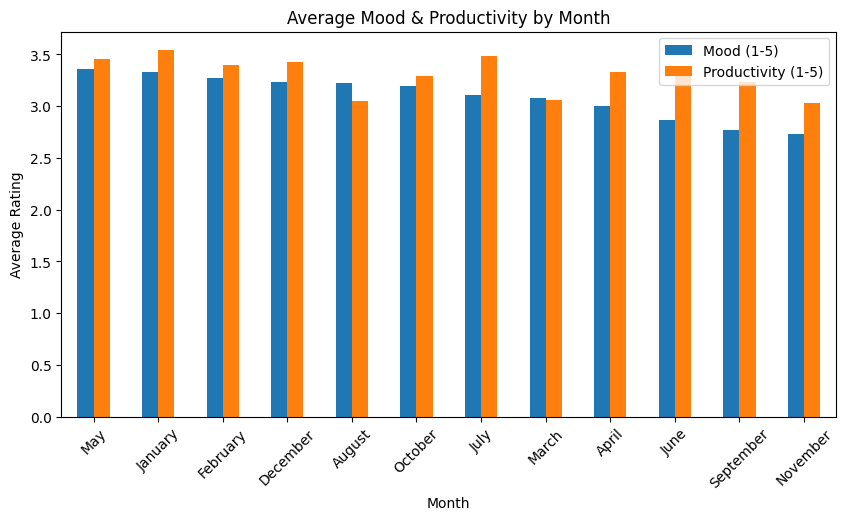

In [ ]:
avg_month = df.groupby("Month")[["Mood (1-5)", "Productivity (1-5)"]].mean().sort_values(by="Mood (1-5)", ascending=False)
avg_month.plot(kind="bar", figsize=(10,5))
plt.title("Average Mood & Productivity by Month")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()

#### 📅 Monthly Mood & Productivity

- **May and October** have the highest average mood scores — possibly due to vacation periods or weather.
- **August and December** show slight drops in productivity — potentially due to distractions or breaks.
- Mood and productivity seem to peak together, suggesting a **seasonal relationship** between emotional state and work output.


# Insights
- 7–8 hours of sleep is the sweet spot for better mood and higher productivity.

- More screen time is mildly associated with lower productivity.

- Better mood → Higher productivity: Strongest positive correlation found.

- Sundays have the highest screen time, weekdays are more balanced.

- Mood and productivity peak in May and October; dip during August and December.

- Both lack and excess of sleep negatively affect mood and productivity.

- Seasonal and weekly patterns suggest behavior is influenced by external rhythms (e.g., holidays, academic schedules).

In [ ]:
df.to_csv("eda_outputs.csv", index=False)